# Capstone Project, Luca Ignatescu

## Data Analysis and Processing

In [4]:
import numpy as np
import pandas
import pandas as pd
import sklearn
import random
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE
from scipy.stats import zscore
from sklearn.mixture import GaussianMixture
import sklearn.metrics as metrics
import seaborn as sns

NETID = 16696027
random.seed(NETID)
np.random.seed(NETID)

sns.set_theme(style="whitegrid")

colors = [
    '#e6194B',
    '#3cb44b',
    '#ffe119',
    '#4363d8',
    '#f58231',
    '#911eb4',
    '#42d4f4',
    '#f032e6',
    '#bfef45',
    '#fabed4']

In [5]:
#utility functions
def plotByLabel(X):
    for label, index in music_labels.items():
        pts = X[trainY == index]
        plt.scatter(pts[:, 0], pts[:, 1], c=colors[index], label=label)
    plt.legend()


In [6]:
df = pd.read_csv("musicData.csv").dropna()
original_count = len(df)


def encode_column(colname, df=df):
    labels = df.groupby(colname)[colname].count().to_dict().keys()
    label_dict = {k: i for i, k in enumerate(labels)}
    df[colname] = df[colname].apply(lambda x: label_dict[x])
    return label_dict


print(df.info())
df.head()
#arima model
#vader score
#sentiment analysis
#time series analysis 
# cat pca
# pca for noncategorical and reincorporate the other ones
# 50 - 60% explained variance is reasonable

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             50000 non-null  object 
 15  obtained_date     50000 non-null  object 
 16  valence           50000 non-null  float64
 17

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [74]:
to_plot = df[['duration_ms', 'tempo']]
to_plot.drop(to_plot[to_plot['tempo'] == '?'].index, inplace=True)
to_plot.drop(to_plot[to_plot['duration_ms'] == -1].index, inplace=True)
to_plot['tempo'] = pd.to_numeric(to_plot['tempo'])
to_plot.head()

dur_mean, dur_std = to_plot['duration_ms'].mean(), to_plot['duration_ms'].std()
gaussian1 = np.random.normal(dur_mean, dur_std, 10000)

fig, (ax1, ax2) = plt.subplots(2)
plt.subplots_adjust(hspace=.5)
sns.kdeplot(to_plot['duration_ms'], ax=ax1, label='Duration')
sns.kdeplot(gaussian1, ax=ax1, label='Gaussian')
ax1.legend()
sns.kdeplot(to_plot['tempo'], ax=ax2, label='Tempo')
sns.kdeplot(np.random.normal(to_plot['tempo'].mean(), to_plot['tempo'].std(), 10000))
ax2.legend()


,index,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,2,30097.0,Dillon Francis,Hurricane,28.0,0.003060,0.620,215613.0,0.755,0.011800,G#,0.5340,-4.617,Major,0.0345,127.994,4-Apr,0.333,5
1,14,49205.0,Getter,Bonesaw,27.0,0.000194,0.601,243857.0,0.969,0.776000,D,0.4090,-1.553,Major,0.1850,139.911,4-Apr,0.198,5
2,19,66905.0,empty_field,7th Sevens,50.0,0.028100,0.656,307328.0,0.653,0.858000,F#,0.1120,-11.883,Minor,0.0396,117.999,4-Apr,0.199,5
3,20,58010.0,Alison Wonderland,Carry On,44.0,0.008040,0.516,241877.0,0.920,0.614000,A,0.8010,-4.370,Minor,0.0942,145.027,4-Apr,0.332,5
4,25,36047.0,empty_field,Revolution,34.0,0.023600,0.715,221050.0,0.978,0.000493,D,0.2160,-1.538,Major,0.3620,125.109,4-Apr,0.418,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10090,49988,77107.0,Kid Cudi,The End,51.0,0.195000,0.630,260573.0,0.774,0.098500,A,0.1110,-6.217,Major,0.1200,158.006,4-Apr,0.446,6
10091,49991,40401.0,empty_field,For Real,53.0,0.003920,0.770,211820.0,0.905,0.000003,F,0.1690,-8.235,Minor,0.1440,135.999,4-Apr,0.464,6
10092,49993,37756.0,Lecrae,Cry For You,54.0,0.304000,0.642,263467.0,0.353,0.000000,A#,0.0927,-12.384,Minor,0.2150,89.596,4-Apr,0.276,6
10093,49997,54580.0,Tee Grizzley,First Day Out,75.0,0.171000,0.587,254694.0,0.711,0.000000,C#,0.1250,-6.330,Major,0.4200,98.008,4-Apr,0.381,6


In [8]:
music_labels = encode_column("music_genre")
labels = {v: k for k, v in music_labels.items()}
df = df.drop(df[df['tempo'] == '?'].index).dropna()
df = df.drop(df[df['duration_ms'] == -1.0].index)
df['tempo'] = pd.to_numeric(df['tempo'])

test = df.groupby('music_genre', group_keys=False).apply(lambda s: s.sample(500, random_state=NETID),
                                                         include_groups=True)
train = df.drop(test.index)

test.reset_index(inplace=True, drop=True)
train.reset_index(inplace=True, drop=True)
print(train.info())
print(test.info())
print(df.info())
print(f'Lost {- len(df) + original_count} values')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35560 entries, 0 to 35559
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       35560 non-null  float64
 1   artist_name       35560 non-null  object 
 2   track_name        35560 non-null  object 
 3   popularity        35560 non-null  float64
 4   acousticness      35560 non-null  float64
 5   danceability      35560 non-null  float64
 6   duration_ms       35560 non-null  float64
 7   energy            35560 non-null  float64
 8   instrumentalness  35560 non-null  float64
 9   key               35560 non-null  object 
 10  liveness          35560 non-null  float64
 11  loudness          35560 non-null  float64
 12  mode              35560 non-null  object 
 13  speechiness       35560 non-null  float64
 14  tempo             35560 non-null  float64
 15  obtained_date     35560 non-null  object 
 16  valence           35560 non-null  float6

C:\Users\lucai\AppData\Local\Temp\ipykernel_24156\2456929962.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  test = df.groupby('music_genre', group_keys=False).apply(lambda s: s.sample(500, random_state=NETID),


In [9]:
#train preprocessing
trainY = train['music_genre']
notUsedTrain = train[['artist_name', 'track_name', 'obtained_date', 'instance_id']]

trainX = train.drop(['artist_name', 'track_name', 'obtained_date', 'instance_id', 'music_genre'], axis=1)
trainCat = train[['key', 'mode']]
trainQuant = trainX.drop(['key', 'mode'], axis=1)

trainCat = trainCat.apply(LabelEncoder().fit_transform)
trainQuant = trainQuant.apply(zscore)

trainQuant.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,-0.854586,-0.859828,0.357057,-0.244930,1.094228,2.360907,-0.433014,0.337767,-0.626627,-0.163333,0.299946
1,-1.047679,-0.888112,0.345865,-0.269104,0.583669,-0.520262,2.103822,0.732878,-0.582090,0.261075,-0.501707
2,-0.661493,-0.822565,1.207622,-0.708743,0.375664,-0.548730,-0.228830,0.752259,1.441866,0.261729,-0.756779
3,-0.790222,-0.883447,0.446590,-0.208162,-0.051692,2.234998,-0.228830,0.464313,-0.514790,0.817785,-0.542195
4,0.110878,-0.812295,0.077265,-0.279974,0.765201,-0.556476,-0.544388,0.785483,2.550341,0.979780,-0.918729


In [10]:
#test preprocessing
testY = test['music_genre']
notUsedTest = test[['artist_name', 'track_name', 'obtained_date', 'instance_id']]

testX = test.drop(['artist_name', 'track_name', 'obtained_date', 'instance_id', 'music_genre'], axis=1)
testCat = test[['key', 'mode']]
testQuant = testX.drop(['key', 'mode'], axis=1)

testCat = testCat.apply(LabelEncoder().fit_transform)
testQuant = testQuant.apply(zscore)

testQuant.head()


,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,1.007669,-0.806139,1.172361,-0.025731,0.581293,-0.565161,-0.848196,0.510439,2.171026,-0.929404,0.284080
1,0.110710,-0.896435,-1.133376,0.000751,1.396205,-0.565166,0.593496,1.079748,0.078792,-1.367765,-0.364803
2,0.751395,-0.631841,0.925519,0.393569,-0.260028,-0.556586,-0.116145,0.579965,-0.566074,0.832257,0.580133
3,0.174779,-0.751343,-0.022583,-0.301285,0.207792,-0.565170,0.375624,0.974581,-0.666387,-1.583632,-0.226916
4,0.046642,-0.880988,0.633795,-0.501452,0.754839,-0.565170,-0.433616,0.650609,-0.602378,0.032587,0.701799


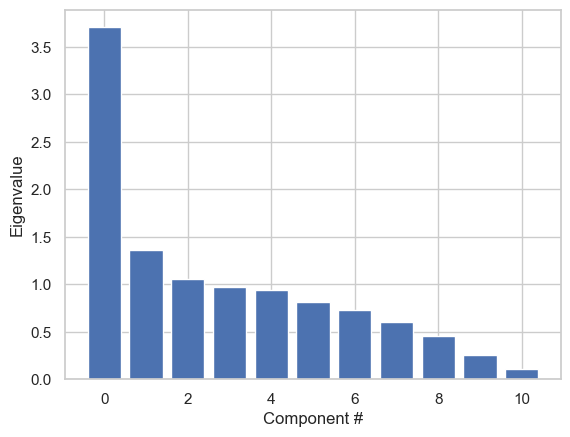

[3.7093773  1.35807519 1.05219631 0.97388297 0.94118344 0.81090775
 0.72503676 0.60067384 0.45932402 0.25848892 0.11116284]
0.6448483903269148


In [11]:
pca = PCA()
X = pca.fit_transform(trainQuant)
plt.bar(list(range(len(pca.explained_variance_))), pca.explained_variance_)
plt.xlabel("Component #")
plt.ylabel("Eigenvalue")
plt.show()
print(pca.explained_variance_)
print(sum(pca.explained_variance_ratio_[:4]))

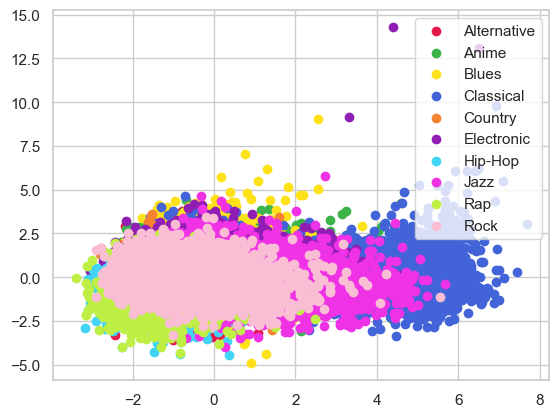

In [12]:
pca2D = PCA(n_components=2)
X = pca.fit_transform(trainQuant)

plotByLabel(X)
plt.show()


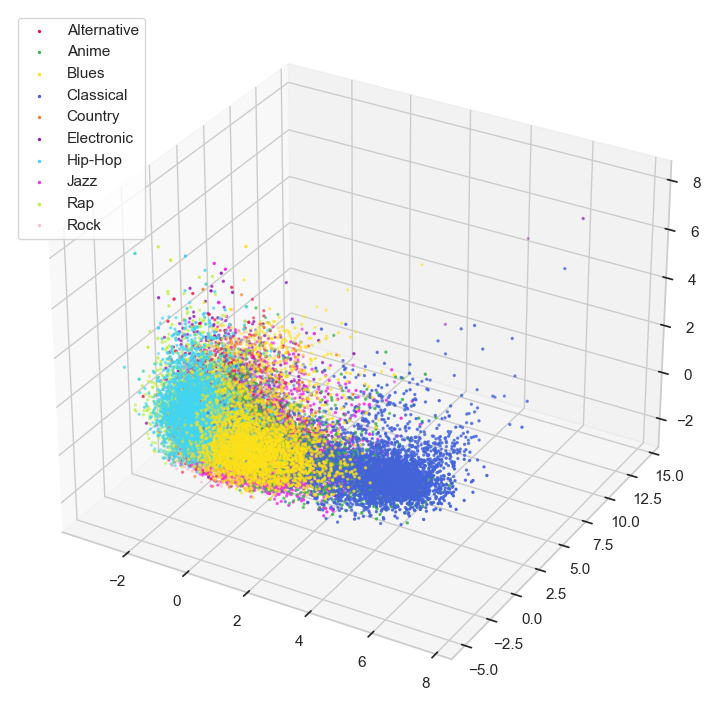

In [54]:
pca3D = PCA(n_components=3)
XPca3D = pca3D.fit_transform(trainQuant)

fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(projection='3d')
ax.set_xlim(-4, 6)
ax.set_ylim(-2.5, 16)
# ax.set_zlim(-0.03, 0)
for label, index in music_labels.items():
    pts = XPca3D[trainY == index]
    plt.scatter(pts[:, 0], pts[:, 1], pts[:, 2], c=colors[index], label=label)
plt.legend()
plt.show()


[6.48450012e-01 1.73370689e-01 1.06680555e-01 3.68170672e-02
 2.35676217e-02 6.77375466e-03 3.79068079e-03 4.92002900e-04
 5.76162570e-05]


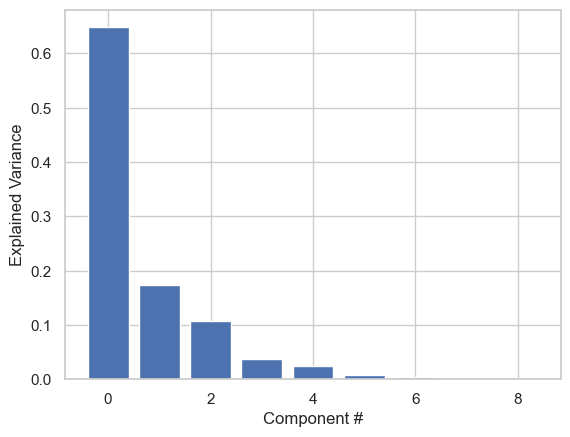

0.928501256551169


In [14]:
lda = LDA()
X = lda.fit_transform(trainQuant, trainY)
print(lda.explained_variance_ratio_)
plt.bar(list(range(len(lda.explained_variance_ratio_))), lda.explained_variance_ratio_)
plt.xlabel("Component #")
plt.ylabel("Explained Variance")
plt.show()

print(sum(lda.explained_variance_ratio_[:3]))

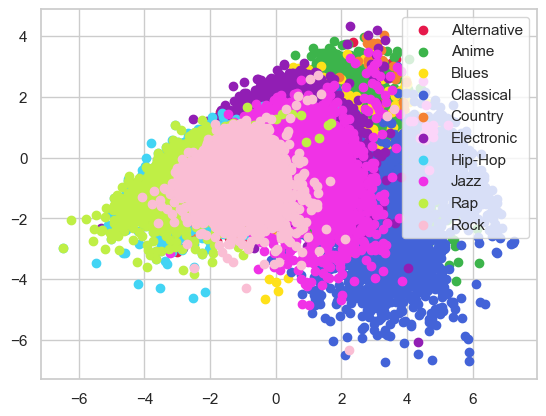

In [15]:
lda2D = LDA(n_components=2)
X = lda2D.fit_transform(trainQuant, trainY)

plotByLabel(X)

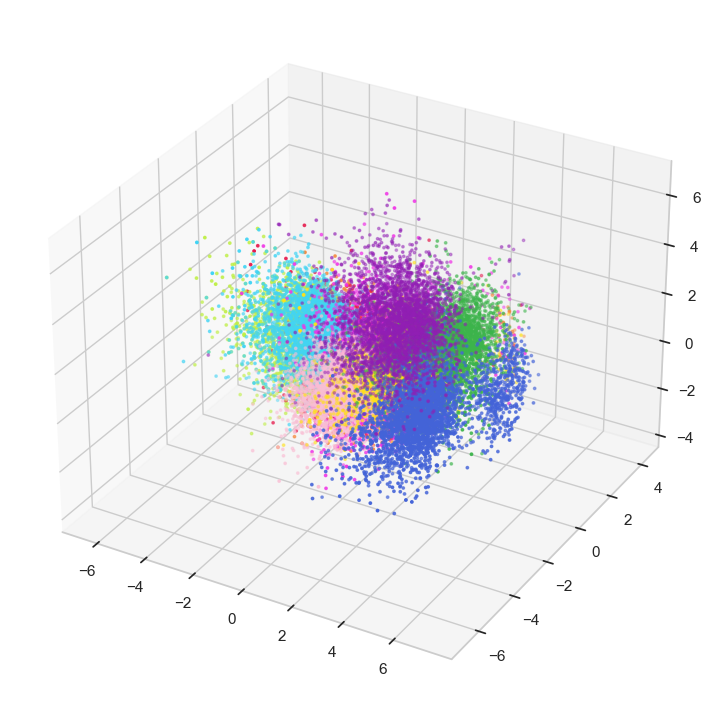

In [55]:
lda3D = LDA(n_components=3)
XLda3D = lda3D.fit_transform(trainQuant, trainY)
plt.close()
fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(projection='3d')
for label, index in music_labels.items():
    pts = XLda3D[trainY == index]
    plt.scatter(pts[:, 0], pts[:, 1], pts[:, 2], c=colors[index])
plt.show()


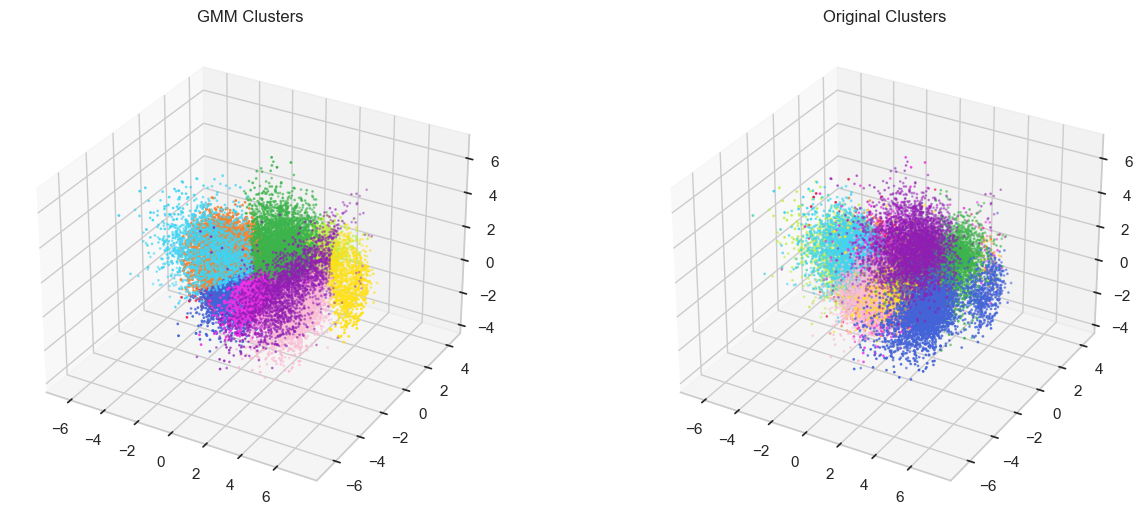

In [71]:
def evaluate_cluster(data, labels=trainY):  #very inconsistent. I will just use LDA
    gmm = GaussianMixture(n_components=10, n_init=5, max_iter=500)
    pred = gmm.fit_predict(data, labels)
    return metrics.accuracy_score(labels, pred)


X1 = LDA(n_components=3).fit_transform(PCA(n_components=3).fit_transform(trainQuant), trainY)
X2 = LDA(n_components=3).fit_transform(trainQuant, trainY)
X3 = LDA(n_components=3).fit_transform(PCA(n_components=4).fit_transform(trainQuant), trainY)
X4 = PCA(n_components=4).fit_transform(trainQuant)

datas = [X1, X2, X3, X4]
for data in datas:
    print(evaluate_cluster(data))

In [49]:
lda3D = LDA(n_components=3)
X_pre_train = lda3D.fit_transform(trainQuant, trainY)
print(sum(lda3D.explained_variance_ratio_[:3]))

0.928501256551169


In [50]:
trainCat.reset_index(drop=True, inplace=True)

trainX = pd.DataFrame(X_pre_train).join(trainCat).reset_index(drop=True)
trainY.reset_index(drop=True, inplace=True)

trainX.head()

,0,1,2,key,mode
0,1.403854,1.608193,1.534316,5,1
1,0.376922,2.160212,0.389051,11,0
2,-1.127205,1.504719,2.372183,4,0
3,0.682714,1.818604,1.899561,9,0
4,-1.698093,0.323620,2.191604,2,0


In [33]:
X_pre_test = lda3D.transform(testQuant)  #transformed with lda fitted on train
testCat.reset_index(drop=True, inplace=True)
testX = pd.DataFrame(X_pre_test).join(testCat).reset_index(drop=True)
testX.reset_index(drop=True, inplace=True)

testX.head()


,0,1,2,key,mode
0,-2.768845,-0.695392,1.592778,2,0
1,-0.210593,0.736674,-0.774040,3,0
2,-1.718668,0.422775,-0.695931,3,0
3,-0.805568,1.019082,-0.830292,9,0
4,-0.631161,1.151467,-0.646228,11,1


In [34]:
X_train, y_train = trainX.values, trainY.values
X_test, y_test = testX.values, testY.values

## Model Selection and Training

In [74]:
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, train_test_split
from collections import Counter
from sklearn.preprocessing import label_binarize



def plot_prediction(y_pred):
    freqs = Counter(y_pred)
    counts = {labels[label]: freq for label, freq in freqs.items()}
    plt.title("Distribution of Predictions")
    plt.barh(list(counts.keys()), list(counts.values()))
    plt.show()


### Logistic Regression

0.4686
0.8696383333333333


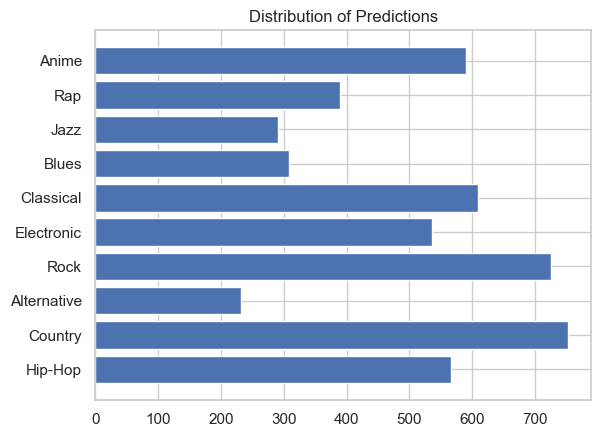

In [23]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(penalty=None, multi_class='ovr')  ##regularized
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_proba_lin = clf.predict_proba(X_test)

print(metrics.accuracy_score(y_test, y_pred))
print(metrics.roc_auc_score(y_test, y_proba_lin, multi_class='ovr'))

plot_prediction(y_pred)

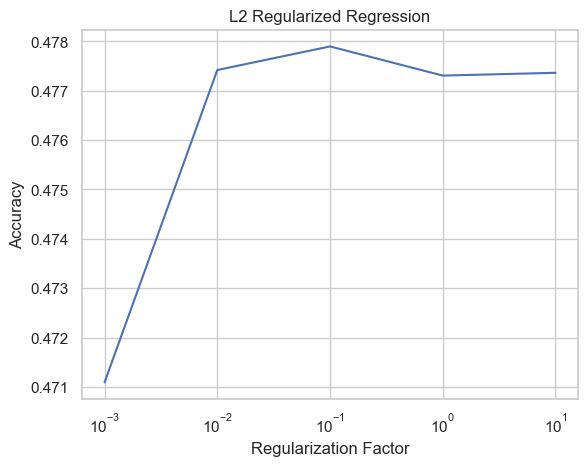

In [24]:
C_vals = [10 ** i for i in range(-3, 2)]
scores = [0] * len(C_vals)

for i, c in enumerate(C_vals):
    l2Logistic = LogisticRegression(penalty='l2', multi_class='ovr', C=c)
    score = np.mean(cross_val_score(l2Logistic, X_train, y_train, cv=10))
    scores[i] = score

plt.plot(C_vals, scores)
plt.title("L2 Regularized Regression")
plt.xlabel("Regularization Factor")
plt.ylabel("Accuracy")
plt.xscale('log')
plt.show()

Performance of best L2 Logistic Regression: 0.4694


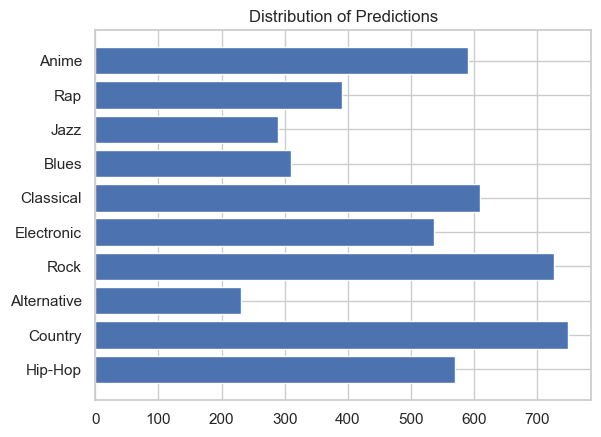

AUROC: 0.8696878222222223


In [27]:
bestC = C_vals[np.argmax(scores)]

best_logistic_l2 = LogisticRegression(penalty='l2', C=bestC, multi_class='ovr')
best_logistic_l2.fit(X_train, y_train)

y_pred = best_logistic_l2.predict(X_test)

print(f'Performance of best L2 Logistic Regression: {metrics.accuracy_score(y_test, y_pred)}')
plot_prediction(y_pred)

y_proba_l2 = best_logistic_l2.predict_proba(X_test)
print(f'AUROC:', metrics.roc_auc_score(y_test, y_proba_l2, multi_class='ovr'))

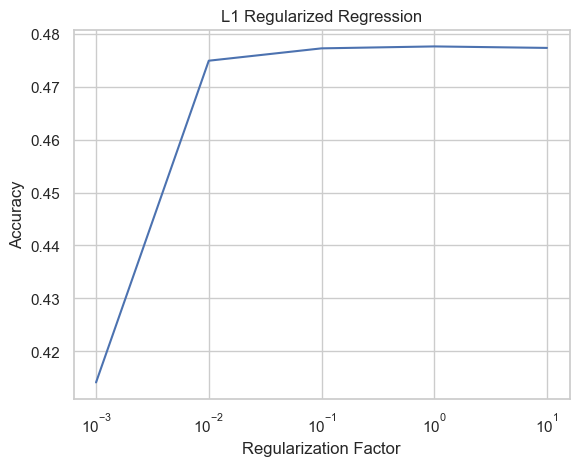

In [28]:

C_vals = [10 ** i for i in range(-3, 2)]
scores = [0] * len(C_vals)

for i, c in enumerate(C_vals):
    l1_logistic = LogisticRegression(penalty='l1', multi_class='ovr', C=c, solver='liblinear')
    score = np.mean(cross_val_score(l1_logistic, X_train, y_train, cv=10))
    scores[i] = score

plt.plot(C_vals, scores)
plt.title("L1 Regularized Regression")
plt.xlabel("Regularization Factor")
plt.ylabel("Accuracy")
plt.xscale('log')
plt.show()


In [97]:

bestC = C_vals[np.argmax(scores)]

best_logistic_l1 = LogisticRegression(penalty='l1', C=bestC, multi_class='ovr', solver='liblinear')
best_logistic_l1.fit(X_train, y_train)

y_pred = best_logistic_l1.predict(X_test)

print(f'Performance of best L1 Logistic Regression: {metrics.accuracy_score(y_test, y_pred)}')

# plot_prediction(y_pred)

y_proba_l1 = best_logistic_l1.predict_proba(X_test)

print(f'AUROC:', metrics.roc_auc_score(y_test, y_proba_l1, multi_class='ovr'))


Performance of best L1 Logistic Regression: 0.4688
AUROC: 0.8696395777777779


### Adaboosted Trees

In [30]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import tree
from IPython.display import clear_output


In [ ]:

# # estimators = list(range(50, 1600, 100))
# # accuracies = []
# 
# for i, n in enumerate(estimators):
#     clear_output(True)
#     bdt = AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=1), algorithm="SAMME", n_estimators=n,
#                              learning_rate=1)  #no cross validation bc it takes too long (for now)
#     bdt.fit(X_train, y_train)
#     y_pred = bdt.predict(X_test)
#     accuracy = metrics.accuracy_score(y_test, y_pred)
#     accuracies.append(accuracy)
# 
#     plt.plot(estimators[:i + 1], accuracies)
#     plt.xlabel("# Estimators")
#     plt.ylabel("Accuracy")
#     plt.show()
# 

In [ ]:
# print(
#     f'Best performance is {max(accuracies) * 100}% accuracy, obtained with {estimators[np.argmax(accuracies)]} estimators')


In [31]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import StratifiedKFold

param_grid = {
    'n_estimators': list(range(100, 1050, 100)),
    'learning_rate': [0.1, 1]
}

model = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=param_grid, cv=StratifiedKFold(5), refit=False,
                     verbose=3,
                     scoring='roc_auc_ovr')
model.fit(X_train, y_train)

best_adaboost = AdaBoostClassifier(**model.best_params_)
print(model.best_params_)
best_adaboost.fit(X_train, y_train)



Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END learning_rate=0.1, n_estimators=100;, score=0.828 total time=   2.9s
[CV 2/5] END learning_rate=0.1, n_estimators=100;, score=0.826 total time=   2.9s
[CV 3/5] END learning_rate=0.1, n_estimators=100;, score=0.827 total time=   2.8s
[CV 4/5] END learning_rate=0.1, n_estimators=100;, score=0.823 total time=   2.7s
[CV 5/5] END learning_rate=0.1, n_estimators=100;, score=0.824 total time=   2.8s
[CV 1/5] END learning_rate=0.1, n_estimators=200;, score=0.808 total time=   5.6s
[CV 2/5] END learning_rate=0.1, n_estimators=200;, score=0.806 total time=   5.8s
[CV 3/5] END learning_rate=0.1, n_estimators=200;, score=0.806 total time=   5.5s
[CV 4/5] END learning_rate=0.1, n_estimators=200;, score=0.807 total time=   5.7s
[CV 5/5] END learning_rate=0.1, n_estimators=200;, score=0.806 total time=   5.5s
[CV 1/5] END learning_rate=0.1, n_estimators=300;, score=0.787 total time=   8.4s
[CV 2/5] END learning_rate=0.1, n_es

AdaBoostClassifier(learning_rate=0.1, n_estimators=100)

In [110]:
y_proba_ada = best_adaboost.predict_proba(X_test)

print(metrics.roc_auc_score(y_test, y_proba_ada, multi_class='ovr'))

0.8220880444444443


### Bagged Trees

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
# n_vals = list(range(15, 30))
# scores = [0] * len(n_vals)
# 
# for i, n in enumerate(n_vals):
#     clear_output(True)
#     bdt = BaggingClassifier(n_estimators=n).fit(X_train, y_train)
#     y_pred = bdt.predict(X_test)
#     scores[i] = metrics.accuracy_score(y_test, y_pred)
#     plt.plot(n_vals[:i + 1], scores[:i + 1])
#     plt.xlabel("# Estimators")
#     plt.ylabel("Accuracy")
#     plt.show()

In [77]:
print(np.max(scores))



0.3718


### Support Vector Machines

In [88]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

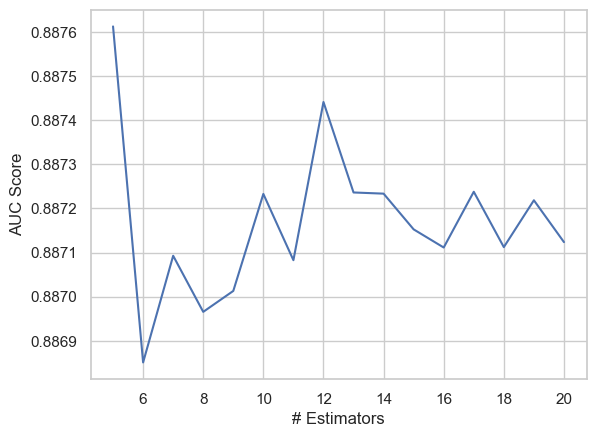

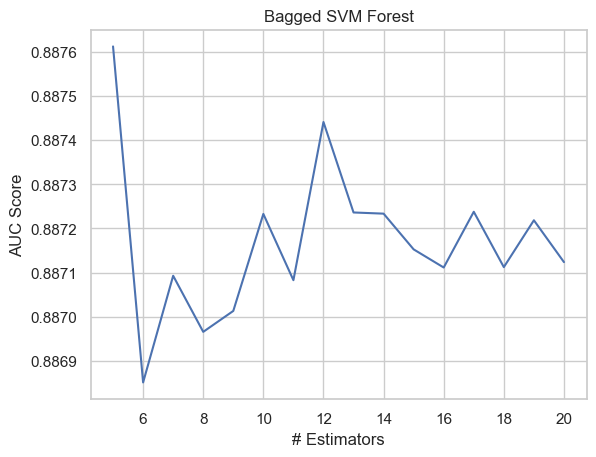

0.4688


In [104]:
estimator = list(range(5, 21))
scores = np.zeros(len(estimator))
for i, n_estimators in enumerate(estimator):
    clear_output(True)
    model = BaggingClassifier(SVC(kernel='linear', probability=True), max_samples=1/n_estimators, n_estimators=n_estimators)
    model.fit(X_train, y_train)
    y_proba = model.predict_proba(X_test)
    score = metrics.roc_auc_score(y_test, y_proba, multi_class='ovr')
    scores[i] = score
    plt.plot(estimator[:i + 1], scores[:i + 1])
    plt.xlabel("# Estimators")
    plt.ylabel("AUC Score")
    plt.show()


plt.plot(estimator, scores)
plt.title("Bagged SVM Forest")
plt.xlabel("# Estimators")
plt.ylabel("AUC Score")
plt.show()

print(metrics.accuracy_score(y_test, y_pred))
best_svm = SVC()

In [105]:
# best_params = {'C': 1, 'degree': 2, 'kernel': 'poly',
#                'probability': True}  #gotten from prev output i didn't want to rerun
# best_svm = SVC(**best_params)
n_estimators = estimator[np.argmax(scores)]
best_svm = BaggingClassifier(SVC(kernel='linear', probability=True), max_samples=1/n_estimators, n_estimators=n_estimators)
best_svm.fit(X_train, y_train)

best_svm.fit(X_train, y_train)
print(metrics.accuracy_score(y_test, best_svm.predict(X_test)))


0.4864


In [108]:
y_proba_svm = best_svm.predict_proba(X_test)

print(metrics.roc_auc_score(y_test, y_proba_svm, multi_class='ovr'))


0.8870863999999999


### Roc Curves

In [115]:
n_classes = 10

def all_roc(y_probs, num_classes = 10, y_true = y_test):
    plt.figure(figsize=(8, 6))

    # Plot ROC curve for each class
    for i in range(num_classes):
        fpr, tpr, _ = metrics.roc_curve((y_true == i), y_probs[:, i])
        roc_auc = metrics.auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{labels[i]} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves (One vs Rest)')
    plt.legend()
    plt.grid(True)
    plt.show()

def ovr_roc(y_score, model_name = ""):
    n_classes = 10
    y_test_binarized = label_binarize(y_test, classes=np.arange(n_classes))

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = metrics.roc_curve(y_test_binarized[:, i], y_score[:, i])
        roc_auc[i] = metrics.auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = metrics.roc_curve(y_test_binarized.ravel(), y_score.ravel())
    roc_auc["micro"] = metrics.auc(fpr["micro"], tpr["micro"])

    # Aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at these points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = metrics.auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    # plt.figure()
    # plt.plot(fpr["micro"], tpr["micro"],
    #          label='Micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]),
    #          color='deeppink', linestyle=':', linewidth=4)

    # plt.plot(fpr["macro"], tpr["macro"],
    #          label=f'{model_name} (area = {roc_auc["macro"]:0.2f})', color=np.random.choice(colors))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    return fpr["macro"], tpr["macro"], roc_auc["macro"]


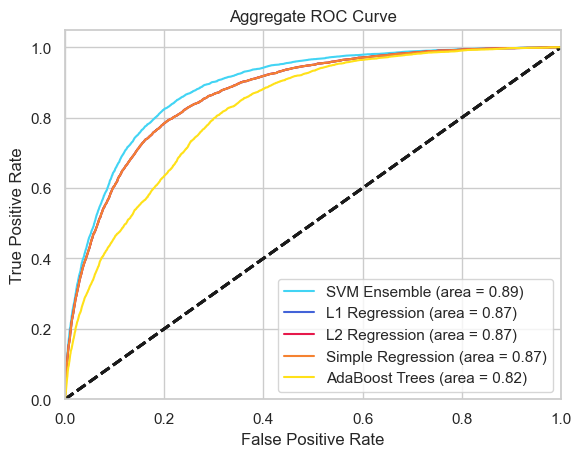

In [118]:
probs=[y_proba_svm,y_proba_l1, y_proba_l2, y_proba_lin, y_proba_ada]
models=["SVM Ensemble", "L1 Regression", "L2 Regression", "Simple Regression", "AdaBoost Trees"]
plt.figure()
for prob, model in zip(probs, models):
    x, y, z = ovr_roc(prob, model)
    plt.plot(x, y,label=f'{model} (area = {z:0.2f})', color=np.random.choice(colors))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Aggregate ROC Curve')
plt.legend(loc="lower right")
plt.show()


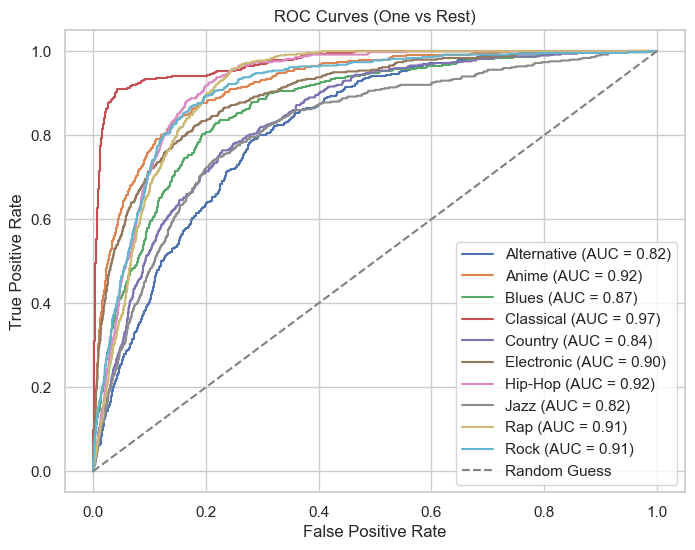

In [119]:
all_roc(y_proba_svm)